In [1]:
from utils import *
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)

In [3]:
train_data, train_results, test_data, test_results = read_data()

In [4]:
from sklearn.neighbors import KNeighborsRegressor

def kneighbors_regressor(train_data, train_results, test_data, features='all', prediction_mode='delta', **est_parameters):
    est = KNeighborsRegressor(n_jobs=-1, **est_parameters)
    
    if features == 'all':
        make_model = to_model_with_features
    else:
        make_model = to_model
    
    if prediction_mode == 'delta':
        make_results = make_delta
        unmake_results = unmake_delta
    else:
        make_results = lambda train_data, train_results: train_results
        unmake_results = lambda test_data, prediction: prediction
    
    est.fit(make_model(train_data), to_model(make_results(train_data, train_results))) 
    prediction = unmake_results(test_data, from_model(est.predict(make_model(test_data))))
        
    return prediction

1/5: 2016-12-21 21:52:22
2/5: 2016-12-21 21:52:23
3/5: 2016-12-21 21:52:25
4/5: 2016-12-21 21:52:27
5/5: 2016-12-21 21:52:29
done! 2016-12-21 21:52:31
Results: [-0.042016348160028416, -0.043679335101576067, -0.10440283635385428, -0.1639266035601572, -0.21666329989296051]


[-0.042016348160028416,
 -0.043679335101576067,
 -0.10440283635385428,
 -0.1639266035601572,
 -0.21666329989296051]

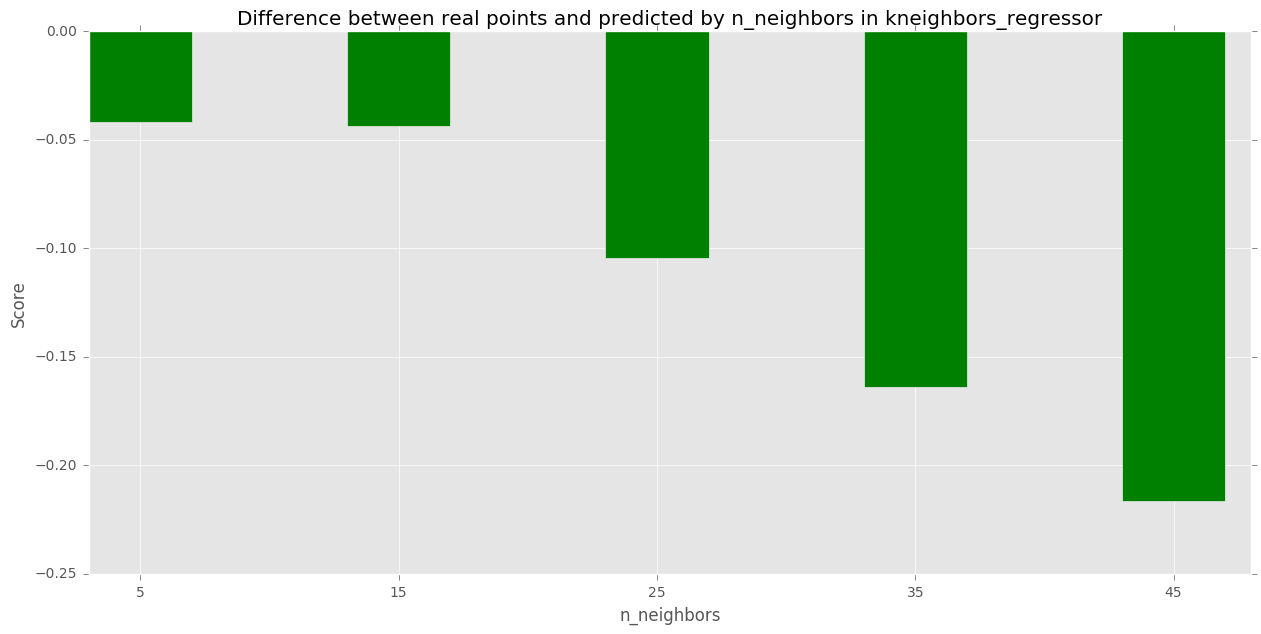

In [5]:
compare_results(function=kneighbors_regressor, test_results=test_results, parameter_name='n_neighbors',
                list_of_values=range(5, 50, 10), train_data=train_data, train_results=train_results,
                test_data=test_data, features='coordinates', prediction_mode='coordinates')

1/5: 2016-12-21 21:52:31
2/5: 2016-12-21 21:52:56
3/5: 2016-12-21 21:53:27
4/5: 2016-12-21 21:54:02
5/5: 2016-12-21 21:54:39
done! 2016-12-21 21:55:18
Results: [-0.0014432794216163725, -0.081819335599085719, -0.16878636592746665, -0.24184100104331341, -0.30539067223200989]


[-0.0014432794216163725,
 -0.081819335599085719,
 -0.16878636592746665,
 -0.24184100104331341,
 -0.30539067223200989]

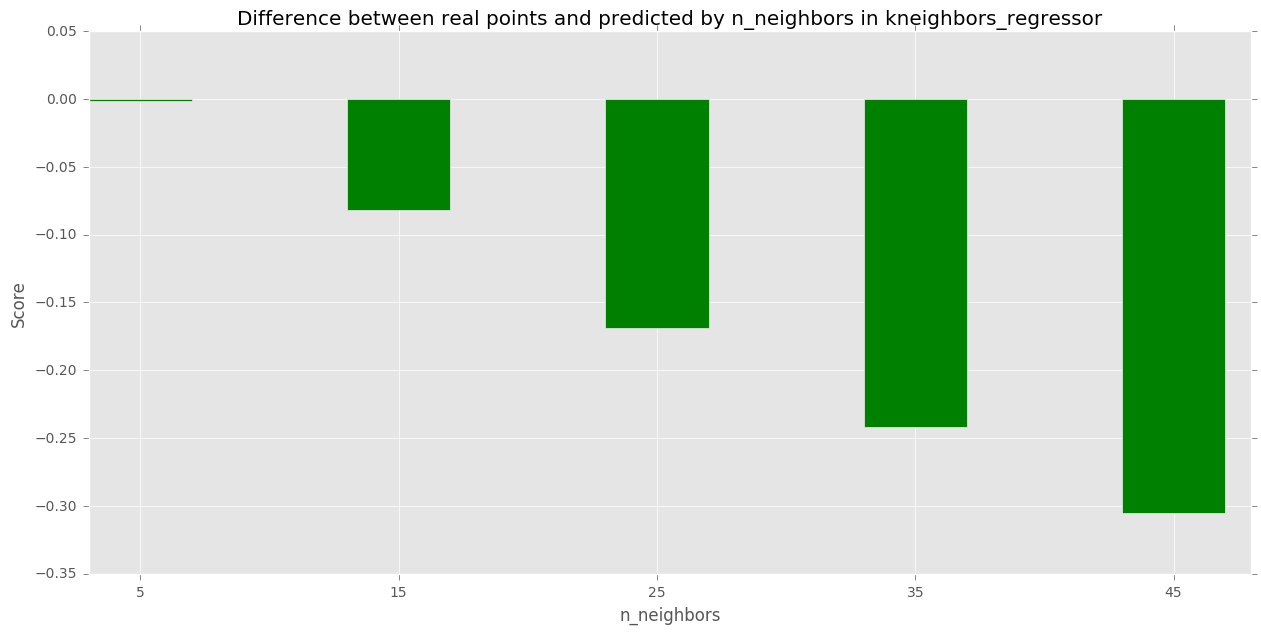

In [6]:
compare_results(function=kneighbors_regressor, test_results=test_results, parameter_name='n_neighbors',
                list_of_values=range(5, 50, 10), train_data=train_data, train_results=train_results,
                test_data=test_data, features='all', prediction_mode='coordinates')

1/5: 2016-12-21 21:55:19
2/5: 2016-12-21 21:55:44
3/5: 2016-12-21 21:56:17
4/5: 2016-12-21 21:56:53
5/5: 2016-12-21 21:57:33
done! 2016-12-21 21:58:14
Results: [0.23664941932753758, 0.27058204698557686, 0.25628051716333766, 0.23890943154454269, 0.22313863202307116]


[0.23664941932753758,
 0.27058204698557686,
 0.25628051716333766,
 0.23890943154454269,
 0.22313863202307116]

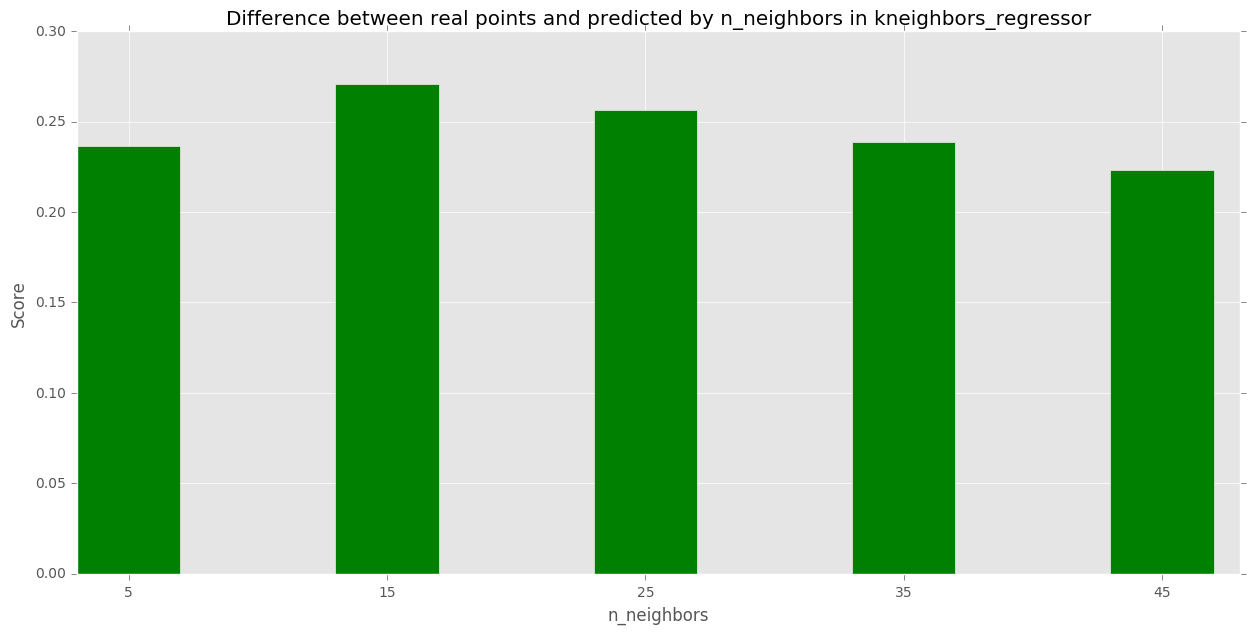

In [7]:
compare_results(function=kneighbors_regressor, test_results=test_results, parameter_name='n_neighbors',
                list_of_values=range(5, 50, 10), train_data=train_data, train_results=train_results,
                test_data=test_data, features='all', prediction_mode='delta')